In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [39]:
url1 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/nut/Yami%20Nuts.csv'
url2 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/nut/Nut-Weee!-Snacks-ScrapingData-ScrapeStorm.csv'
url3 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/nut/nut-freshgogoData-ScrapeStorm.csv'
yami = pd.read_csv(url1, encoding='latin1')
yami.head()

,Product_Name,Brand,Price,Reviews,Origin,Rate,Platform,Category,Sold_Weekly,Sold_Monthly,Weekly_Revenue
0,NUTS LAB Buldak Flavor Almond 120g,nuts lab,4.29,2,Korea,5.0,Yami,Nuts,25,100,107.25
1,Super Nuts Pecans 225g,three squirrels,9.59,0,Mainland China,0.0,Yami,Nuts,25,100,239.75
2,Salted Egg Yolk Macadamia Nuts 65g,kam yuen,4.29,0,Mainland China,0.0,Yami,Nuts,25,100,107.25
3,Super Nuts Pistachio Nuts 225g,three squirrels,10.99,0,Mainland China,0.0,Yami,Nuts,25,100,274.75
4,LIAN FENG Hickory Nuts Kernels 108g,lianfeng,11.99,114,Mainland China,4.8,Yami,Nuts,25,100,299.75


In [40]:
weee = pd.read_csv(url2, encoding='latin1')
weee.head()

,Product_Name,Price,Sold_Weekly,Origin,Brand,Reviews,Sold_Monthly,Weekly_Revenue,Rate,Platform,Category
0,ChaCha Original Roasted Sunflower Seeds 250 g,3.39,1000,Mainland China,Cha Cha,636,4000,3390.0,Unclear,Weee,Nuts
1,ChaCha Roasted Spiced Flavor Sunflower Seeds 2...,3.19,1000,Mainland China,Cha Cha,851,4000,3190.0,Unclear,Weee,Nuts
2,"ChaCha Roasted Sunflower Seeds, Chinese Pecan ...",3.19,1000,Unclear,Unclear,734,4000,3190.0,Unclear,Weee,Nuts
3,Huang Fei Hong Spicy Peanuts 210 g,3.69,600,Mainland China,Unclear,103,2400,2214.0,Unclear,Weee,Nuts
4,"Ganyuan Broad Beans, Crab Roe Flavor 285 g",3.99,900,Mainland China,GanYuan,457,3600,3591.0,Unclear,Weee,Nuts


In [41]:
freshgogo = pd.read_csv(url3)
freshgogo.head()

,Price,Product_Name,Origin,Sold_Monthly,Reviews,Rate,Brand,Platform,Category,Sold_Weekly,Weekly_Revenue
0,3.39,CHA CHAA Sunflower Seed (coconut flavor),Unclear,12777,11,Unclear,Unclear,Freshgogo,Nuts,3194,10829
1,3.39,CHA CHAA Sunflower Seed (Sichuan Pepper),Mainland China,6364,5,Unclear,Unclear,Freshgogo,Nuts,1591,5393
2,5.89,ASIAN TASTE Roasted Organic Chestnut,Mainland China,5939,0,Unclear,Unclear,Freshgogo,Nuts,1485,8745
3,2.99,JUBES Coconut Gel (orginal),Japan,5927,0,Unclear,Unclear,Freshgogo,Nuts,1482,4430
4,5.09,Peanut,Unclear,6600,8,Unclear,Unclear,Freshgogo,Nuts,1650,8399


# Combine three tables together

In [42]:
df = pd.concat([yami,weee,freshgogo])
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Brand,Category,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
0,nuts lab,Nuts,Korea,Yami,4.29,NUTS LAB Buldak Flavor Almond 120g,5,2,100,25,107.25
1,three squirrels,Nuts,Mainland China,Yami,9.59,Super Nuts Pecans 225g,0,0,100,25,239.75
2,kam yuen,Nuts,Mainland China,Yami,4.29,Salted Egg Yolk Macadamia Nuts 65g,0,0,100,25,107.25
3,three squirrels,Nuts,Mainland China,Yami,10.99,Super Nuts Pistachio Nuts 225g,0,0,100,25,274.75
4,lianfeng,Nuts,Mainland China,Yami,11.99,LIAN FENG Hickory Nuts Kernels 108g,4.8,114,100,25,299.75


In [43]:
print(df.shape)
print(list(df.columns))

(661, 11)
['Brand', 'Category', 'Origin', 'Platform', 'Price', 'Product_Name', 'Rate', 'Reviews', 'Sold_Monthly', 'Sold_Weekly', 'Weekly_Revenue']


# Analysis

In [44]:
df.describe()

,Price,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue
count,661.000000,661.000000,661.000000,661.00000,661.000000
mean,6.940514,24.313162,1139.239032,284.81997,1667.917927
std,7.447707,71.809767,2489.035495,622.28285,3718.826031
min,0.890000,0.000000,0.000000,0.00000,0.000000
25%,2.990000,1.000000,100.000000,25.00000,87.250000
50%,4.490000,4.000000,200.000000,50.00000,299.500000
75%,7.990000,15.000000,800.000000,200.00000,1178.000000
max,67.990000,851.000000,17000.000000,4250.00000,31941.000000


In [45]:
df.sum(axis = 0)

Brand             nuts labthree squirrelskam yuenthree squirrels...
Category          NutsNutsNutsNutsNutsNutsNutsNutsNutsNutsNutsNu...
Origin            KoreaMainland ChinaMainland ChinaMainland Chin...
Platform          YamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYamiYa...
Price                                                       4587.68
Product_Name      NUTS LAB Buldak Flavor Almond 120gSuper Nuts P...
Reviews                                                       16071
Sold_Monthly                                                 753037
Sold_Weekly                                                  188266
Weekly_Revenue                                          1.10249e+06
dtype: object

In [46]:
df['Origin'] = df['Origin'].replace('ROYAL FAMILY','Unclear')

# The Most Popular Origin (Highest Weekly Revenue /Num of Product)


In [47]:
origin = df.groupby(['Origin'])['Product_Name'].count()
origin

Origin
Australia           5
Canada              1
India               7
Indonesia           5
Italy               1
Japan              26
Korea              29
Mainland China    382
Mexico              7
Philippines        15
Singapore           2
South Korea        13
Taiwan             73
Thailand            5
Unclear            47
United States      40
Vietnam             3
Name: Product_Name, dtype: int64

In [48]:
pop_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()/df.groupby(['Origin'])['Product_Name'].count()
pop_origin

Origin
Australia          988.900000
Canada               0.000000
India                0.000000
Indonesia          175.500000
Italy                0.000000
Japan             1038.442308
Korea              401.293103
Mainland China    1511.896597
Mexico               0.000000
Philippines        314.966667
Singapore          486.250000
South Korea        550.038462
Taiwan            1101.479452
Thailand           795.000000
Unclear           7603.734043
United States      623.256250
Vietnam            318.000000
dtype: float64

In [49]:
pop_origin.sort_values(ascending=False).head(15)

Origin
Unclear           7603.734043
Mainland China    1511.896597
Taiwan            1101.479452
Japan             1038.442308
Australia          988.900000
Thailand           795.000000
United States      623.256250
South Korea        550.038462
Singapore          486.250000
Korea              401.293103
Vietnam            318.000000
Philippines        314.966667
Indonesia          175.500000
Italy                0.000000
India                0.000000
dtype: float64

# The most popular brand by unit selling


In [50]:
pop_brand = df.groupby(['Brand'])['Weekly_Revenue'].sum()/df.groupby(['Brand'])['Product_Name'].count()
pop_brand

Brand
3-mien            477.00
BESTORE             0.00
Big Green        1134.00
Boy Bawang        334.00
CORN NUTS          79.50
                  ...   
zhangerga          72.25
zhenglin          239.75
zhenxin            94.75
zhenxinshipin      99.75
zhimaguan          49.75
Length: 154, dtype: float64

In [51]:
pop_brand.sort_values(ascending=False).head(5)

Brand
bestnut           11955.750000
Wang Korea         5592.000000
Mushroom Storm     4417.000000
LIAN FENG          4379.666667
Unclear            3688.419689
dtype: float64

# The popular brand by revenue

In [52]:
pop_brand2 = df.groupby(['Brand'])['Weekly_Revenue'].sum()
pop_brand2

Brand
3-mien            954.00
BESTORE             0.00
Big Green        1134.00
Boy Bawang       1002.00
CORN NUTS          79.50
                  ...   
zhangerga         289.00
zhenglin          239.75
zhenxin           189.50
zhenxinshipin      99.75
zhimaguan          49.75
Name: Weekly_Revenue, Length: 154, dtype: float64

In [53]:
pop_brand2.sort_values(ascending=False).head(5)

Brand
Unclear        711865.00
bestnut         95646.00
be & cheery     48594.25
bestore         39215.50
LIAN FENG       13139.00
Name: Weekly_Revenue, dtype: float64

# The Main Import Origin

In [54]:
main_origin = df.groupby(['Origin'])['Product_Name'].count()
main_origin

Origin
Australia           5
Canada              1
India               7
Indonesia           5
Italy               1
Japan              26
Korea              29
Mainland China    382
Mexico              7
Philippines        15
Singapore           2
South Korea        13
Taiwan             73
Thailand            5
Unclear            47
United States      40
Vietnam             3
Name: Product_Name, dtype: int64

In [55]:
main_origin.sort_values(ascending=False).head(5)

Origin
Mainland China    382
Taiwan             73
Unclear            47
United States      40
Korea              29
Name: Product_Name, dtype: int64

# The most value import Origin

In [56]:
value_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()
value_origin

Origin
Australia           4944.50
Canada                 0.00
India                  0.00
Indonesia            877.50
Italy                  0.00
Japan              26999.50
Korea              11637.50
Mainland China    577544.50
Mexico                 0.00
Philippines         4724.50
Singapore            972.50
South Korea         7150.50
Taiwan             80408.00
Thailand            3975.00
Unclear           357375.50
United States      24930.25
Vietnam              954.00
Name: Weekly_Revenue, dtype: float64

In [57]:
value_origin.sort_values(ascending=False).head(5)

Origin
Mainland China    577544.50
Unclear           357375.50
Taiwan             80408.00
Japan              26999.50
United States      24930.25
Name: Weekly_Revenue, dtype: float64

# platform offers choice - most


In [58]:
choice = df.groupby(['Platform'])['Product_Name'].count()
choice

Platform
Freshgogo     75
Weee         160
Yami         426
Name: Product_Name, dtype: int64

In [59]:
value_choice =  df.groupby(['Platform'])['Weekly_Revenue'].sum()/df.groupby(['Platform'])['Product_Name'].count()
value_choice

Platform
Freshgogo    8414.866667
Weee          889.562500
Yami          772.414906
dtype: float64

## The Number of profuct by origin

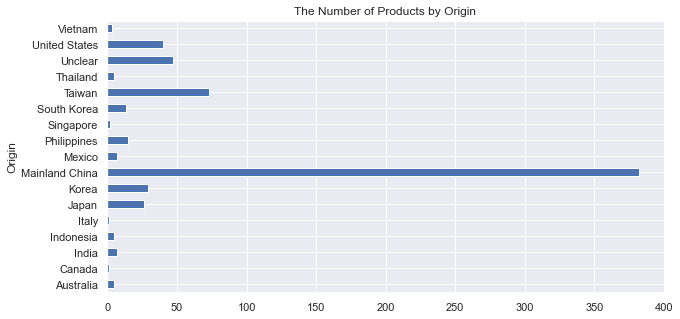

In [60]:
count_origin = df.groupby([df['Origin']])['Product_Name'].count()
count_origin.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Origin ")

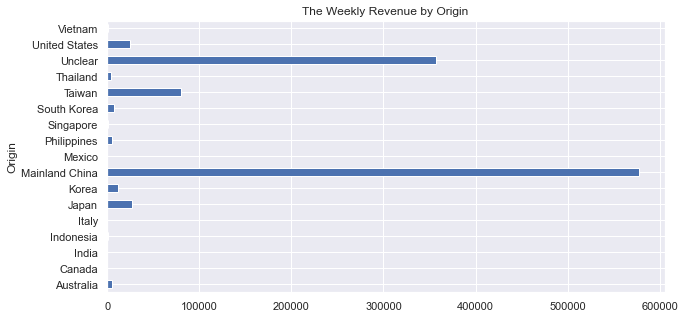

In [61]:
sum_revenue = df.groupby([df['Origin']])['Weekly_Revenue'].sum()
sum_revenue.plot(kind='barh',figsize=(10,5),legend=None, title="The Weekly Revenue by Origin ")

In [62]:
count_platform = df.groupby(['Platform'])['Product_Name'].count()
count_platform

Platform
Freshgogo     75
Weee         160
Yami         426
Name: Product_Name, dtype: int64

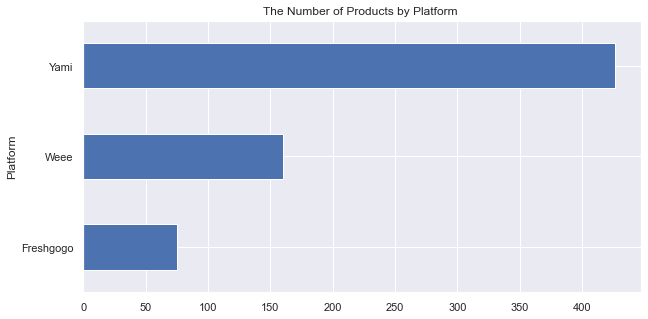

In [63]:
platform = df.groupby([df['Platform']])['Brand'].count()
platform.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Platform ")

Text(0.5, 1.0, 'Figure 5: Correlations')

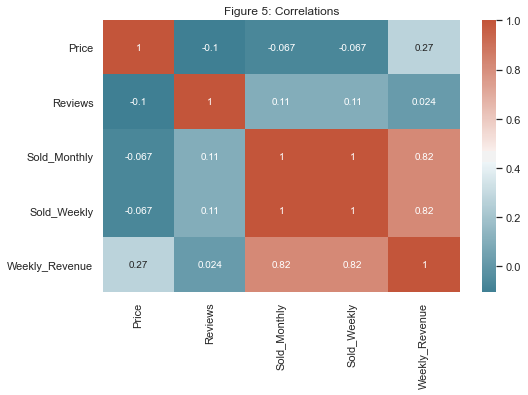

In [64]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(8,5))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

## Origin vs Platform


Text(0.5, 1.0, 'Platform vs. Origin')

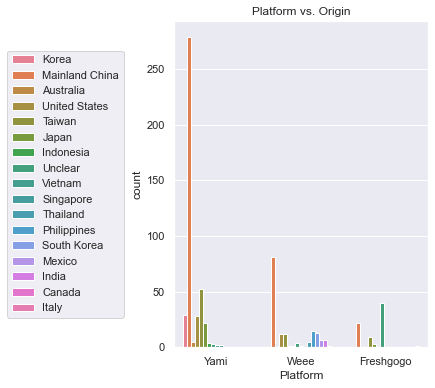

In [65]:
# Origin vs Platform

plt.rcParams['figure.figsize'] = (10, 6)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Platform',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Platform vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


Platform,Freshgogo,Weee,Yami
Origin,,,
Australia,0,0,5
Canada,0,1,0
India,0,7,0
Indonesia,0,1,4
Italy,1,0,0
Japan,3,1,22
Korea,0,0,29
Mainland China,22,81,279
Mexico,0,7,0


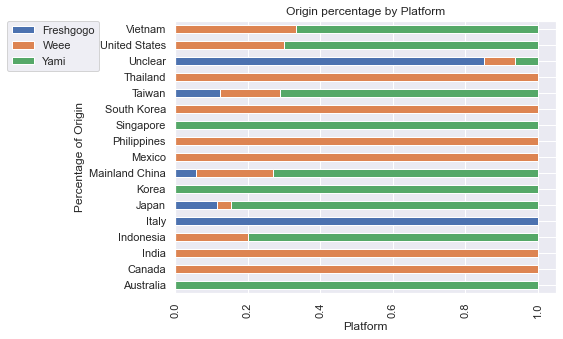

In [66]:
# check the Origin percentage of Platform
plt.rcParams['figure.figsize'] = (15, 5)
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Origin, df.Platform)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Platform')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Platform')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Origin')

c2_c

## Origin Vs Sold_Weekly_Group

In [67]:
df['Sold_Weekly_Group'] = pd.cut(x = df['Sold_Weekly'], 
                                   bins = [0,50,100,200,300,400,500,1000,2000,10000],
                                   labels = ['Less than 50','50+','100+','200+','300+','400+','500+','1000+','2000+'])
df.head()

,Brand,Category,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group
0,nuts lab,Nuts,Korea,Yami,4.29,NUTS LAB Buldak Flavor Almond 120g,5,2,100,25,107.25,Less than 50
1,three squirrels,Nuts,Mainland China,Yami,9.59,Super Nuts Pecans 225g,0,0,100,25,239.75,Less than 50
2,kam yuen,Nuts,Mainland China,Yami,4.29,Salted Egg Yolk Macadamia Nuts 65g,0,0,100,25,107.25,Less than 50
3,three squirrels,Nuts,Mainland China,Yami,10.99,Super Nuts Pistachio Nuts 225g,0,0,100,25,274.75,Less than 50
4,lianfeng,Nuts,Mainland China,Yami,11.99,LIAN FENG Hickory Nuts Kernels 108g,4.8,114,100,25,299.75,Less than 50


Text(0.5, 1.0, 'Sold_Weekly_Group vs. Origin')

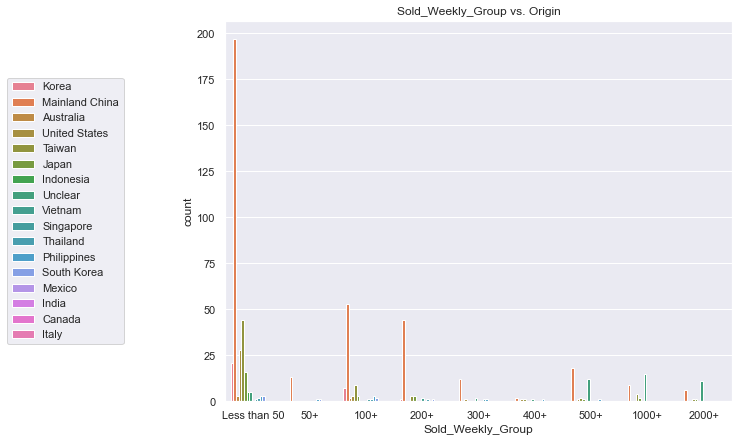

In [68]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 7)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Sold_Weekly_Group',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Sold_Weekly_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Origin,Australia,Indonesia,Japan,Korea,Mainland China,Philippines,Singapore,South Korea,Taiwan,Thailand,Unclear,United States,Vietnam
Sold_Weekly_Group,,,,,,,,,,,,,
Less than 50,3,5,16,21,197,3,1,3,44,2,5,28,0
50+,0,0,0,0,13,1,0,1,0,0,0,0,0
100+,2,0,3,7,53,3,1,2,9,1,0,3,0
200+,0,0,3,1,44,0,0,1,3,1,0,0,2
300+,0,0,0,0,12,1,0,0,0,1,2,1,0
400+,0,0,0,0,2,1,0,0,1,0,1,1,0
500+,0,0,1,0,18,1,0,0,2,0,12,1,0
1000+,0,0,2,0,9,0,0,0,4,0,15,0,0
2000+,0,0,1,0,6,0,0,0,1,0,11,0,0


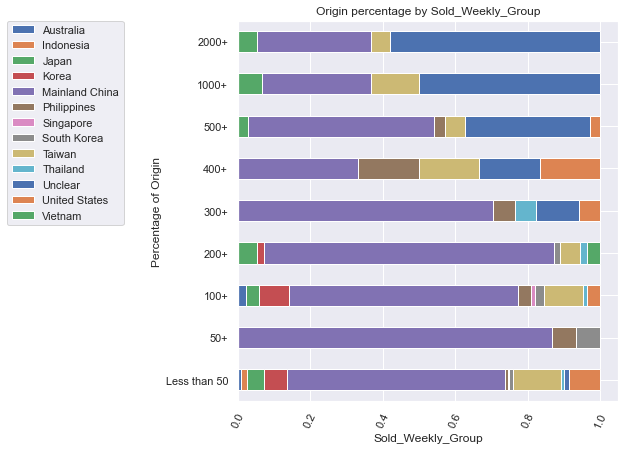

In [76]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 7)
# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab( df.Sold_Weekly_Group, df.Origin)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Sold_Weekly_Group')
plt.legend(bbox_to_anchor=(-0.3, 1), loc='left', borderaxespad=0)
plt.xlabel('Sold_Weekly_Group')
plt.xticks(rotation=65)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Origin

In [70]:
df['Price_Group'] = pd.cut(x = df['Price'], 
                                   bins = [0,2,4,6,8,10,12,14,16,10000],
                                   labels = ['Less than 2','2+','4+','6+','8+','10+','12+','14+','16+'])
df.head()

,Brand,Category,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Sold_Weekly_Group,Price_Group
0,nuts lab,Nuts,Korea,Yami,4.29,NUTS LAB Buldak Flavor Almond 120g,5,2,100,25,107.25,Less than 50,4+
1,three squirrels,Nuts,Mainland China,Yami,9.59,Super Nuts Pecans 225g,0,0,100,25,239.75,Less than 50,8+
2,kam yuen,Nuts,Mainland China,Yami,4.29,Salted Egg Yolk Macadamia Nuts 65g,0,0,100,25,107.25,Less than 50,4+
3,three squirrels,Nuts,Mainland China,Yami,10.99,Super Nuts Pistachio Nuts 225g,0,0,100,25,274.75,Less than 50,10+
4,lianfeng,Nuts,Mainland China,Yami,11.99,LIAN FENG Hickory Nuts Kernels 108g,4.8,114,100,25,299.75,Less than 50,10+


Text(0.5, 1.0, 'Price_Group vs. Origin')

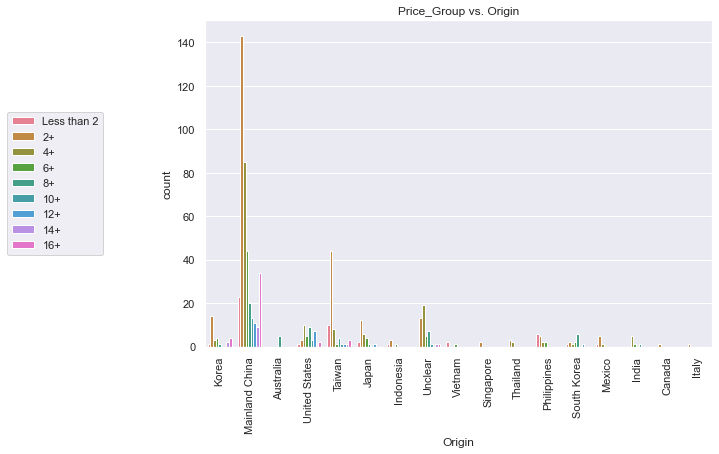

In [71]:
# origin vs Price group

plt.rcParams['figure.figsize'] = (20, 6)

# compare the year with Origin with price group
plt.subplot(121)
sns.countplot(x='Origin',hue= 'Price_Group', data=df, palette = 'husl')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


Origin,Australia,Canada,India,Indonesia,Italy,Japan,Korea,Mainland China,Mexico,Philippines,Singapore,South Korea,Taiwan,Thailand,Unclear,United States,Vietnam
Price_Group,,,,,,,,,,,,,,,,,
Less than 2,0,0,0,1,0,2,1,23,1,6,0,1,10,0,0,1,2
2+,0,1,0,3,1,12,14,143,5,5,2,2,44,3,13,3,0
4+,0,0,5,0,0,6,3,85,1,2,0,1,8,2,19,10,0
6+,0,0,1,1,0,4,4,44,0,2,0,2,1,0,5,5,1
8+,5,0,0,0,0,1,1,20,0,0,0,6,4,0,7,9,0
10+,0,0,1,0,0,0,0,13,0,0,0,0,1,0,1,3,0
12+,0,0,0,0,0,1,0,11,0,0,0,1,1,0,0,7,0
14+,0,0,0,0,0,0,2,9,0,0,0,0,1,0,1,0,0
16+,0,0,0,0,0,0,4,34,0,0,0,0,3,0,1,2,0


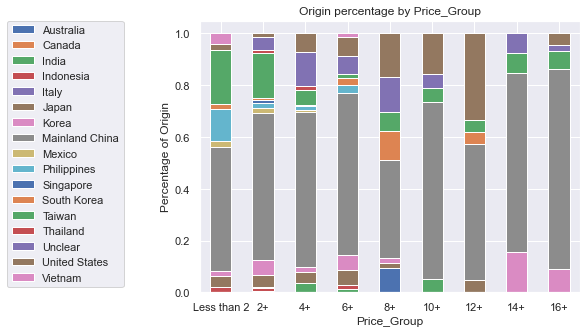

In [72]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 5)

# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Origin)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Sold_Weekly_Group


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+,1000+,2000+
Price_Group,,,,,,,,,
Less than 2,20,1,8,7,2,1,7,0,1
2+,123,3,50,9,9,2,13,7,9
4+,74,2,14,6,1,2,9,13,4
6+,32,3,2,14,1,0,2,4,3
8+,24,1,5,4,1,0,3,4,2
10+,10,0,2,2,1,0,0,1,0
12+,11,0,1,5,0,0,1,1,0
14+,10,0,1,0,1,1,0,0,0
16+,24,5,1,8,1,0,0,0,0


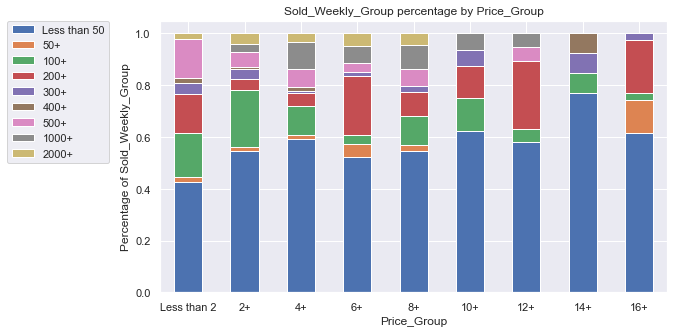

In [73]:
plt.rcParams['figure.figsize'] = (20, 5)

# check the Price_Group percentage of Sold_Weekly_Group
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Sold_Weekly_Group percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.1, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Sold_Weekly_Group')

c2_c

Text(0.5, 1.0, 'Price_Group vs. Sold_Weekly_Group')

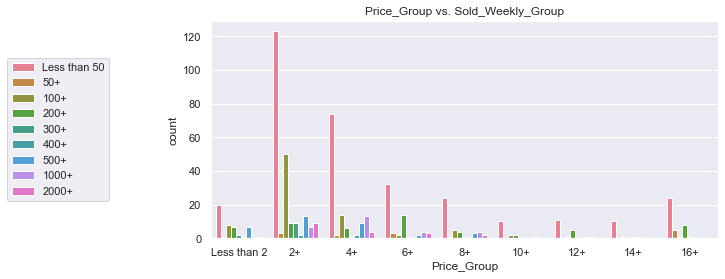

In [74]:
# price group vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 4)

# compare the year with price group with sold weekly group
plt.subplot(121)
sns.countplot(x='Price_Group',hue= 'Sold_Weekly_Group', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Sold_Weekly_Group')

In [75]:
df.to_csv(r'C:\Users\13750\Desktop\Empire Bazaar Group Corp\US chinese product market\SNACK MARKET\Analysis Data\nut\nut.csv', index = False)